**Python3 OpenCV4 start guide.**  
https://farrokhkarimi.github.io/

# Installation

There are many ways to install OpenCV including installing from the source, installing via pip, and installing via apt. The best way to install OpenCV is using pip. You must have pip installed. You should run the command via CMD or Terminal (It may need to be run as an administrator):

```
pip3 install opencv-python
```

Also, you can use apt in Ubuntu:

```
sudo apt-get install python3-opencv
```

You also need to install numpy to use OpenCV:

```
pip3 install numpy
```

These packages are installed in Colab. Now you can import cv2 and print its version:

In [1]:
import numpy as np
import cv2
print("OpenCV-Python Version {}".format(cv2.__version__))

OpenCV-Python Version 4.10.0


Note that we can use skimage alongside OpenCV. Skimage is another good pythonic library for image processing. You can install skimage via pip:

```
pip3 install scikit-image
```

# Getting Started with Images

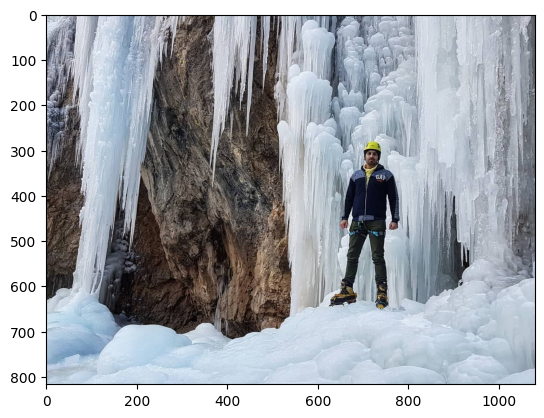

In [2]:
from skimage import io
import matplotlib.pyplot as plt

# reading the sample image from a url
image = io.imread('https://farrokhkarimi.github.io/images/gallery/modals/ice-m.jpg')
plt.imshow(image)
plt.show()

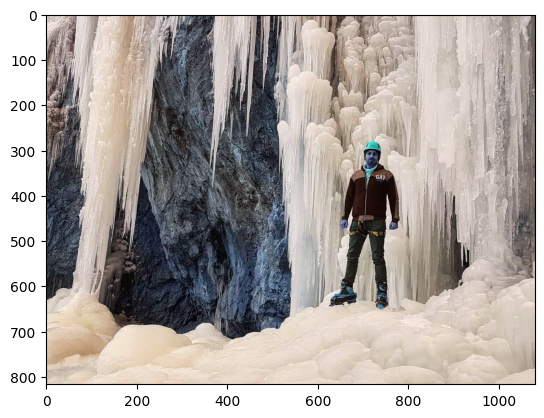

In [3]:
# saving the image on the disk
io.imsave('image.jpg', image)

# loading the image from the disk
image = cv2.imread('image.jpg')

plt.imshow(image)
plt.show()

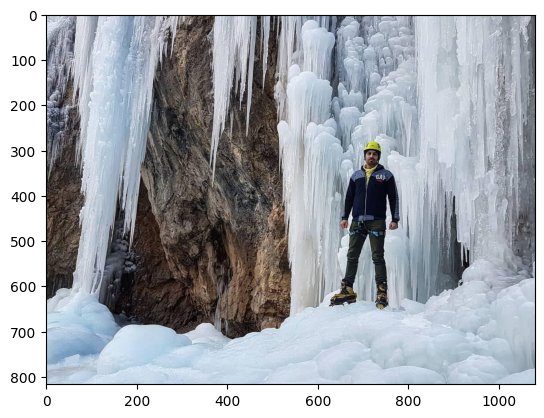

In [4]:
# plt.imshow(img) shown an image with wrong colorspace. we should correct the colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [5]:
# listing the folders and files in the current directory using unix command
!ls

image.jpg  sample_data


# Getting Started with Videos

Ref: https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html

You can't open the webcam using OpenCV in Colab but you can use a Colab snippet to read the webcam:

In [6]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [7]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

NotAllowedError: Permission denied


# Drawing Functions in OpenCV

In [8]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)

In [9]:
# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

# Drawing Rectangle
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

# Drawing Circle
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

# Drawing Ellipse
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

# Drawing Polygon
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))

In [10]:
# Adding Text to Images
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA);

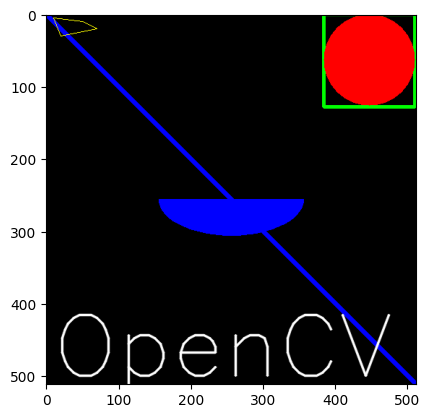

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Mouse as a Paint-Brush

Ref: https://docs.opencv.org/4.x/db/d5b/tutorial_py_mouse_handling.html

# Trackbar as the Color Palette

Ref: https://docs.opencv.org/4.x/d9/dc8/tutorial_py_trackbar.html

Here we will create a simple application which shows the color you specify. You have a window which shows the color and three trackbars to specify each of B,G,R colors. You slide the trackbar and correspondingly window color changes. By default, initial color will be set to Black.

# Basic Operations on Images

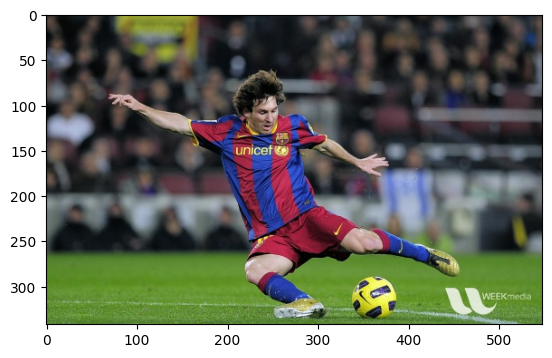

In [12]:
messi5 = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/messi5.jpg?raw=true')
messi = messi5.copy()
plt.imshow(messi)
plt.show()

In [13]:
# accessing and modifying pixel values
px = img[100,100]
print(px)
messi[100,100] = [255,255,255]
print(img[100,100])

[255   0   0]
[255   0   0]


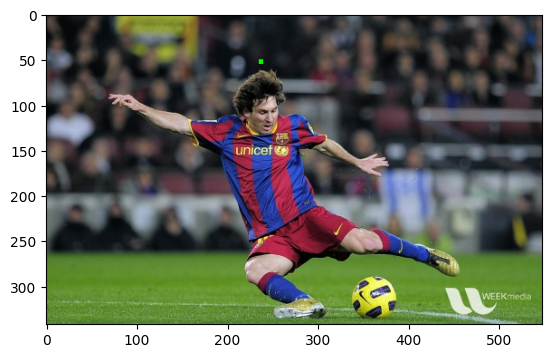

In [14]:
# changing pixel values
for i in range(5):
    for j in range(5):
        messi[50+i, 235+j] = (0, 255, 0)

plt.imshow(messi)

In [15]:
# accessing image properties
print(messi.shape)
print(messi.size)
print(messi.dtype)

(342, 548, 3)
562248
uint8


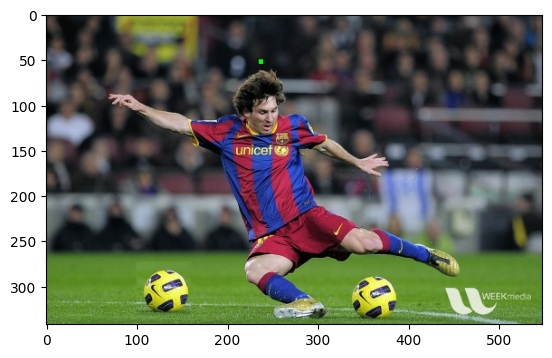

In [16]:
# image ROI
ball = messi[280:340, 330:390]
messi[273:333, 100:160] = ball

plt.imshow(messi)

In [17]:
# splitting and merging image channels
b,g,r = cv2.split(messi)
messi = cv2.merge((b,g,r))

print(r)

[[39 42 44 ... 57 55 52]
 [37 42 46 ... 62 60 57]
 [41 46 51 ... 64 63 60]
 ...
 [56 48 49 ... 60 63 73]
 [54 59 50 ... 56 69 64]
 [45 58 71 ... 49 52 51]]


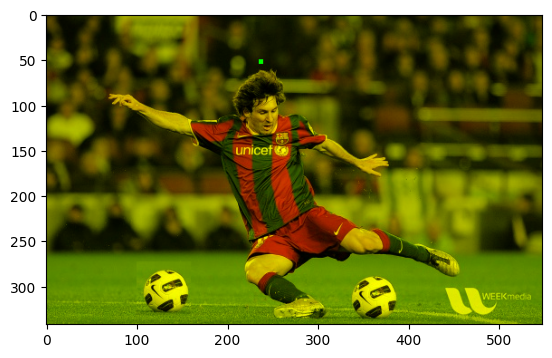

In [18]:
# set all the red pixles to zero using numpy indexing
messi[:,:,2] = 0

plt.imshow(messi)

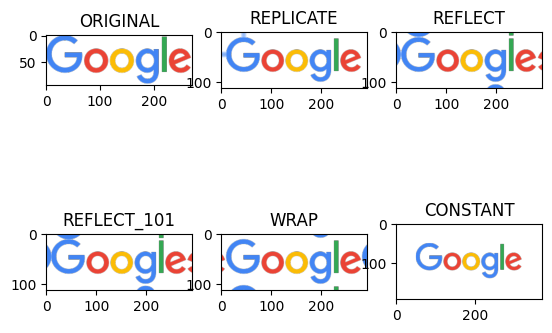

In [19]:
# making borders for images (padding)
img = io.imread('https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png')

replicate = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img,50,50,50,50,cv2.BORDER_CONSTANT,value=[255,255,255])

plt.subplot(231),plt.imshow(img),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant),plt.title('CONSTANT')

plt.show()

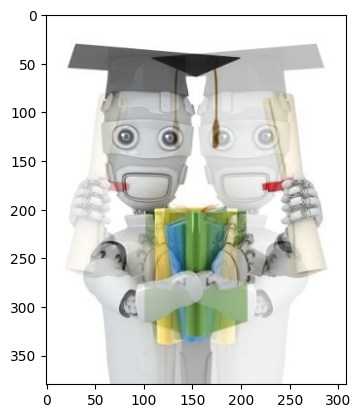

In [20]:
# image addition
img1 = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/ml.png?raw=true')
img2 = cv2.flip(img1, 1)

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

plt.imshow(dst)

# Geometric Transformations of Images

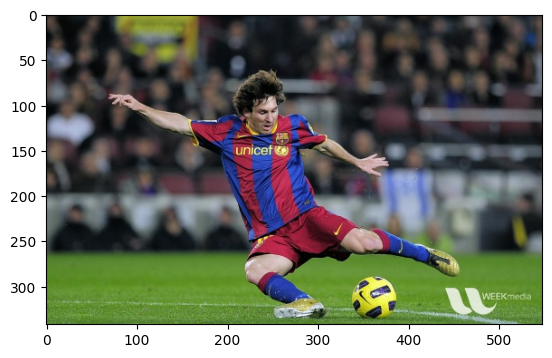

In [21]:
messi = messi5.copy()
plt.imshow(messi)
plt.show()

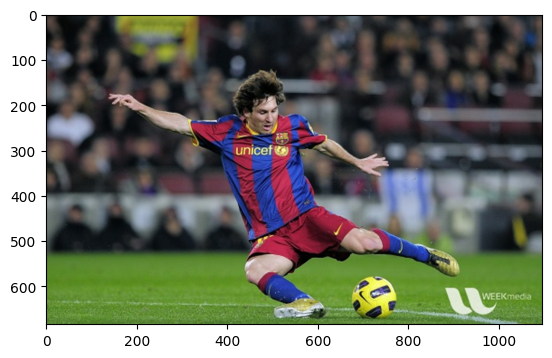

In [22]:
# Scaling
res = cv2.resize(messi,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)

In [23]:
rows,cols,ch = messi.shape

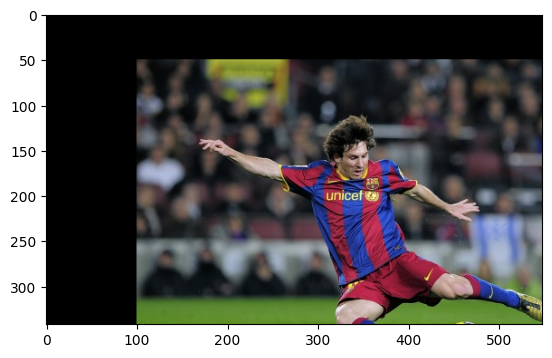

In [24]:
# Translation
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(messi,M,(cols,rows))

plt.imshow(dst)

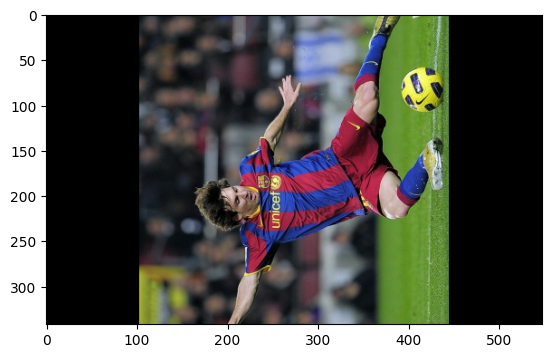

In [25]:
# Rotation
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(messi,M,(cols,rows))

plt.imshow(dst)

In [ ]:
# Perspective Transformation
img = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/sudoku.png?raw=true')
rows,cols,ch = img.shape
pts1 = np.float32([[73,86],[489,69],[36,514],[520,522]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# Image Thresholding

In [ ]:
# Simple Thresholding
img = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/gradient.png?raw=true')
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [ ]:
# Adaptive Thresholding
img = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/sudoku.png?raw=true')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Smoothing Images

Ref: https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

In [ ]:
# 2D Convolution ( Image Filtering )
img = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/opencv-logo.png?raw=true')

kernel = np.ones((7,7),np.float32)/49
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Image Blurring (Image Smoothing)
blur = cv2.blur(img,(9,9))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

You can use the other kernels to smoothing your image:

```python
# Gaussian Filtering
blur = cv2.GaussianBlur(img,(5,5),0)

# Median Filtering (highly effective in removing salt-and-pepper noise)
median = cv2.medianBlur(img,5)

# Bilateral Filtering
blur = cv2.bilateralFilter(img,9,75,75)
```

# Morphological Transformations

Ref: https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

In [ ]:
img = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/pic1.png?raw=true')
img = np.invert(img)
plt.imshow(img)

In [ ]:
# Erosion
kernel = np.ones((7,7),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))

In [ ]:
# Dilation
kernel = np.ones((7,7),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)

plt.imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))

# Edge Detection

Ref: https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

In [ ]:
# Canny Edge Detection

edges = cv2.Canny(messi,100,200)

plt.subplot(121),plt.imshow(messi,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Contours

Ref: https://docs.opencv.org/4.x/d3/d05/tutorial_py_table_of_contents_contours.html

In [ ]:
# finding contours
imgray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# drawing contours
img2 = img.copy()
cv2.drawContours(img2, contours, -1, (0,255,0), 3)

plt.imshow(img2)

# Histograms

Ref: https://docs.opencv.org/4.x/de/db2/tutorial_py_table_of_contents_histograms.html

You can use OpenCV or numpy to calculate Histogram. Here we use numpy for Histogram calculation.

In [ ]:
img = image.copy()

plt.figure()
plt.imshow(img)
plt.title('Photo'), plt.xticks([]), plt.yticks([])
plt.figure()
plt.hist(img.ravel(),256,[0,256])
plt.title('Gray and RGB Histogram'), plt.xticks([]), plt.yticks([])
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
img = io.imread('https://farrokhkarimi.github.io/images/gallery/modals/canyon-m.jpg')

plt.figure()
plt.imshow(img)
plt.title('Photo'), plt.xticks([]), plt.yticks([])
plt.figure()
plt.hist(img.ravel(),256,[0,256])
plt.title('Gray and RGB Histogram'), plt.xticks([]), plt.yticks([])
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# Fourier Transform



Ref: https://docs.opencv.org/4.x/de/dbc/tutorial_py_fourier_transform.html

Why Laplacian is a High Pass Filter?

In [ ]:
# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

# Template Matching

Ref: https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

In [ ]:
img = io.imread('https://github.com/farrokhkarimi/OpenCV/blob/master/images/mario.jpg?raw=true')
plt.imshow(img)
plt.show()
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# croping the template from the main image
template = img[74:90,72:83]
plt.imshow(template)
plt.show()
template_gray = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)
ch, w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template_gray,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
res = img.copy()
for pt in zip(*loc[::-1]):
    cv2.rectangle(res, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(res)

# Hough Transforms

Hough Line Transform Ref: https://docs.opencv.org/4.x/d6/d10/tutorial_py_houghlines.html

Hough Circle Transform Ref: https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html

# Understanding Features

Ref: https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html

# Depth Map from Stereo Images

Ref: https://docs.opencv.org/4.x/dd/d53/tutorial_py_depthmap.html

Author : [https://farrokhkarimi.github.io/](https://farrokhkarimi.github.io/)  
Reference : [opencv.org](https://opencv.org/)